In [39]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import networkx as nx



In [40]:
movies_data=pd.read_csv(r'.\movie_dataset.csv',header=None)

num_records=len(movies_data)

records=[]
for i in range(num_records):
    row = []
    for j in range(movies_data.shape[1]): #number of columns
        value = movies_data.values[i, j]
        if pd.notna(value):  # Keep only valid values
            row.append(str(value))
    if row:  
        records.append(row)

print(records)


[['The Revenant', '13 Hours', 'Allied', 'Zootopia', 'Jigsaw', 'Achorman', 'Grinch', 'Fast and Furious', 'Ghostbusters', 'Wolverine', 'Mad Max', 'John Wick', 'La La Land', 'The Good Dunosaur', 'Ninja Turtles', 'The Good Dunosaur Bad Moms', '2 Guns', 'Inside Out', 'Valerian', 'Spiderman 3'], ['Beirut', 'Martian', 'Get Out'], ['Deadpool'], ['X-Men', 'Allied'], ['Ninja Turtles', 'Moana', 'Ghost in the Shell', 'Ralph Breaks the Internet', 'John Wick'], ['Mad Max'], ['The Spy Who Dumped Me', 'Hotel Transylvania'], ['Thor', 'London Has Fallen', 'The Lego Movie'], ['Intern', 'Tomb Rider', 'John Wick'], ['Hotel Transylvania'], ['Get Out', 'Suicide Squad'], ['Doctor Strange'], ['X-Men', 'Beirut', 'Ninja Turtles', 'Get Out', 'Fantastic Beast'], ['Tomb Rider', 'Cafe Society', 'Doctor Strange'], ['Ninja Turtles', 'The Good Dunosaur Bad Moms'], ['Ninja Turtles'], ['The Revenant', 'Coco', 'Captain America', 'La La Land', 'Spiderman 2', 'Fantastic Beast', 'Mad Max'], ['X-Men', 'Get Out'], ['X-Men', 'H

In [41]:
association_rules=apriori(records,min_support=0.0053,min_confidence=0.20,min_lift=3,min_length=2)
association_results=list(association_rules)

In [42]:
for record in association_results:
    print('Itemset frequemt:',list(record.items))

    print('Support:',record.support)

    for ordered_stat in record.ordered_statistics:

        print('Antecedent:',list(ordered_stat.items_base))

        print('Consequent:',list(ordered_stat.items_add))

        print('confiance:',ordered_stat.confidence)

        print('Lift:',ordered_stat.lift)

        print('-'*50)



Itemset frequemt: ['Red Sparrow', 'Green Lantern']
Support: 0.005732568990801226
Antecedent: ['Red Sparrow']
Consequent: ['Green Lantern']
confiance: 0.3006993006993007
Lift: 3.790832696715049
--------------------------------------------------
Itemset frequemt: ['Star Wars', 'Green Lantern']
Support: 0.005865884548726837
Antecedent: ['Star Wars']
Consequent: ['Green Lantern']
confiance: 0.3728813559322034
Lift: 4.700811850163794
--------------------------------------------------
Itemset frequemt: ['Jumanji', 'Kung Fu Panda']
Support: 0.015997866951073192
Antecedent: ['Kung Fu Panda']
Consequent: ['Jumanji']
confiance: 0.3234501347708895
Lift: 3.2919938411349285
--------------------------------------------------
Itemset frequemt: ['Jumanji', 'Wonder Woman']
Support: 0.005332622317024397
Antecedent: ['Wonder Woman']
Consequent: ['Jumanji']
confiance: 0.3773584905660377
Lift: 3.840659481324083
--------------------------------------------------
Itemset frequemt: ['The Spy Who Dumped Me', '

In [43]:
# Sort association rules by lift in descending order
sorted_rules = sorted(association_results, key=lambda x: x.ordered_statistics[0].lift, reverse=True)

print("Top 5 association rules by Lift:\n")
for item in sorted_rules[:5]:
    pair = item.items
    support = item.support
    for rule in item.ordered_statistics:
        base = tuple(rule.items_base)
        add = tuple(rule.items_add)
        confidence = rule.confidence
        lift = rule.lift
        if base and add:  # Avoid empty antecedent or consequent
            print(f"Rule: {base} -> {add}")
            print(f"Support: {support:.4f}")
            print(f"Confidence: {confidence:.4f}")
            print(f"Lift: {lift:.4f}\n")


Top 5 association rules by Lift:

Rule: ('Star Wars',) -> ('Green Lantern',)
Support: 0.0059
Confidence: 0.3729
Lift: 4.7008

Rule: ('The Spy Who Dumped Me',) -> ('Spiderman 3',)
Support: 0.0080
Confidence: 0.2715
Lift: 4.1224

Rule: ('Tomb Rider', 'Kung Fu Panda') -> ('Jumanji',)
Support: 0.0064
Confidence: 0.3934
Lift: 4.0044

Rule: ('Kung Fu Panda', 'Ninja Turtles') -> ('Jumanji',)
Support: 0.0067
Confidence: 0.3906
Lift: 3.9757

Rule: ('Wonder Woman',) -> ('Jumanji',)
Support: 0.0053
Confidence: 0.3774
Lift: 3.8407



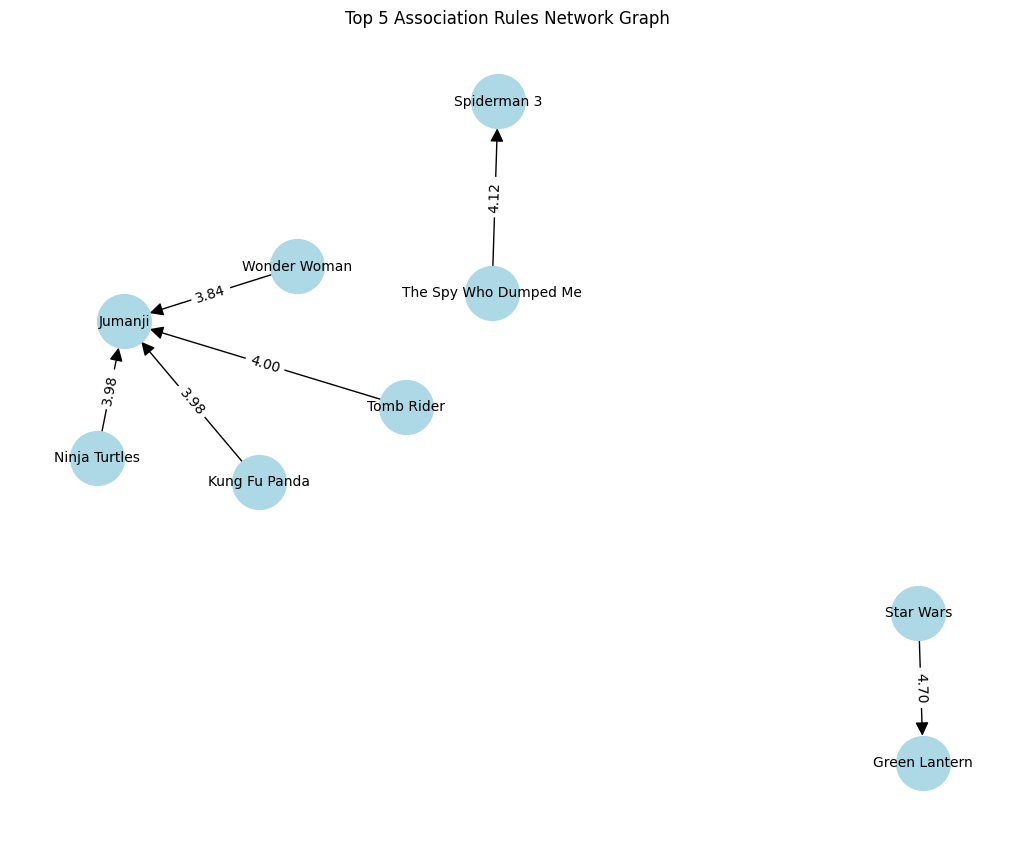

In [44]:

G = nx.DiGraph()

top_rules = sorted_rules[:5]  # top 5 rules by lift

for item in top_rules:
    for rule in item.ordered_statistics:
        base = tuple(rule.items_base)
        add = tuple(rule.items_add)
        if base and add:
            G.add_nodes_from(base)
            G.add_nodes_from(add)
            for b in base:
                for a in add:
                    G.add_edge(b, a, weight=rule.lift)

plt.figure(figsize=(10,8))


pos = nx.spring_layout(G, k=1.5, iterations=100)

nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=10, arrowsize=20)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Top 5 Association Rules Network Graph ")
plt.show()
